In [2]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
#following line allows the Jupyter Notebooks to display graphical plots within the page
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [2]:
#if for any reason you need to identify the working directory you
#can uncomment the following two lines and execute 
#import os
#os.getcwd()

In [3]:
#load the data into a Pandas dataframe...
#see named file for format to use when more samples are available (or for performing analysis on uncategorized samples)
#default for csv is comma, otherwise specify separator, i.e., "\t" for tab separated
#note, the full  path on windows requires double slash ('\\') for directory separators because the backslash is a special escape 
#character (e.g., for specifying tabs '\t' etc.)
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [4]:
#describe() method on a dataframe returns basic descriptive stats
df.describe()

,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.145199,2.121752,1.562434,2.396643,1.755119,2.758241,1.428137,2.307162,1.727845,2.962528,1.261845,1.555137
std,0.440701,0.427735,2.269900,2.514553,0.722924,2.115216,0.897825,1.606379,0.584583,3.657736,0.334253,0.544397
min,0.576401,1.261760,0.540100,0.785031,1.030703,0.853685,0.717397,0.884041,0.981670,0.435450,0.706703,0.806292
25%,0.893243,1.852547,0.788033,1.255342,1.395405,1.431390,1.011027,1.435337,1.376423,0.734178,1.067632,1.142345
50%,1.098843,2.067704,1.004477,1.476345,1.534300,1.881093,1.194247,1.800181,1.575105,1.064982,1.179902,1.482758
75%,1.248820,2.382825,1.299155,1.952906,1.890355,3.201771,1.459858,2.473561,1.912497,3.724620,1.533155,1.724828
max,3.516124,3.682406,15.306730,11.522953,5.255024,9.749722,5.718485,9.256009,4.210971,12.844829,2.306976,3.316831


In [5]:
#info() method of dataframe gives a breakdown of variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      64 non-null     object 
 1   P100    64 non-null     float64
 2   P41     64 non-null     float64
 3   OspC    64 non-null     float64
 4   DbpA    64 non-null     float64
 5   BmpA    64 non-null     float64
 6   DbpB    64 non-null     float64
 7   P45     64 non-null     float64
 8   P58     64 non-null     float64
 9   P66     64 non-null     float64
 10  VlsE    64 non-null     float64
 11  ErpL    64 non-null     float64
 12  OspD    64 non-null     float64
 13  Diag    64 non-null     object 
dtypes: float64(12), object(2)
memory usage: 7.1+ KB


In [6]:
#df.columns returns the name of each column in the datafram as a list
df.columns
#df.dtypes

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

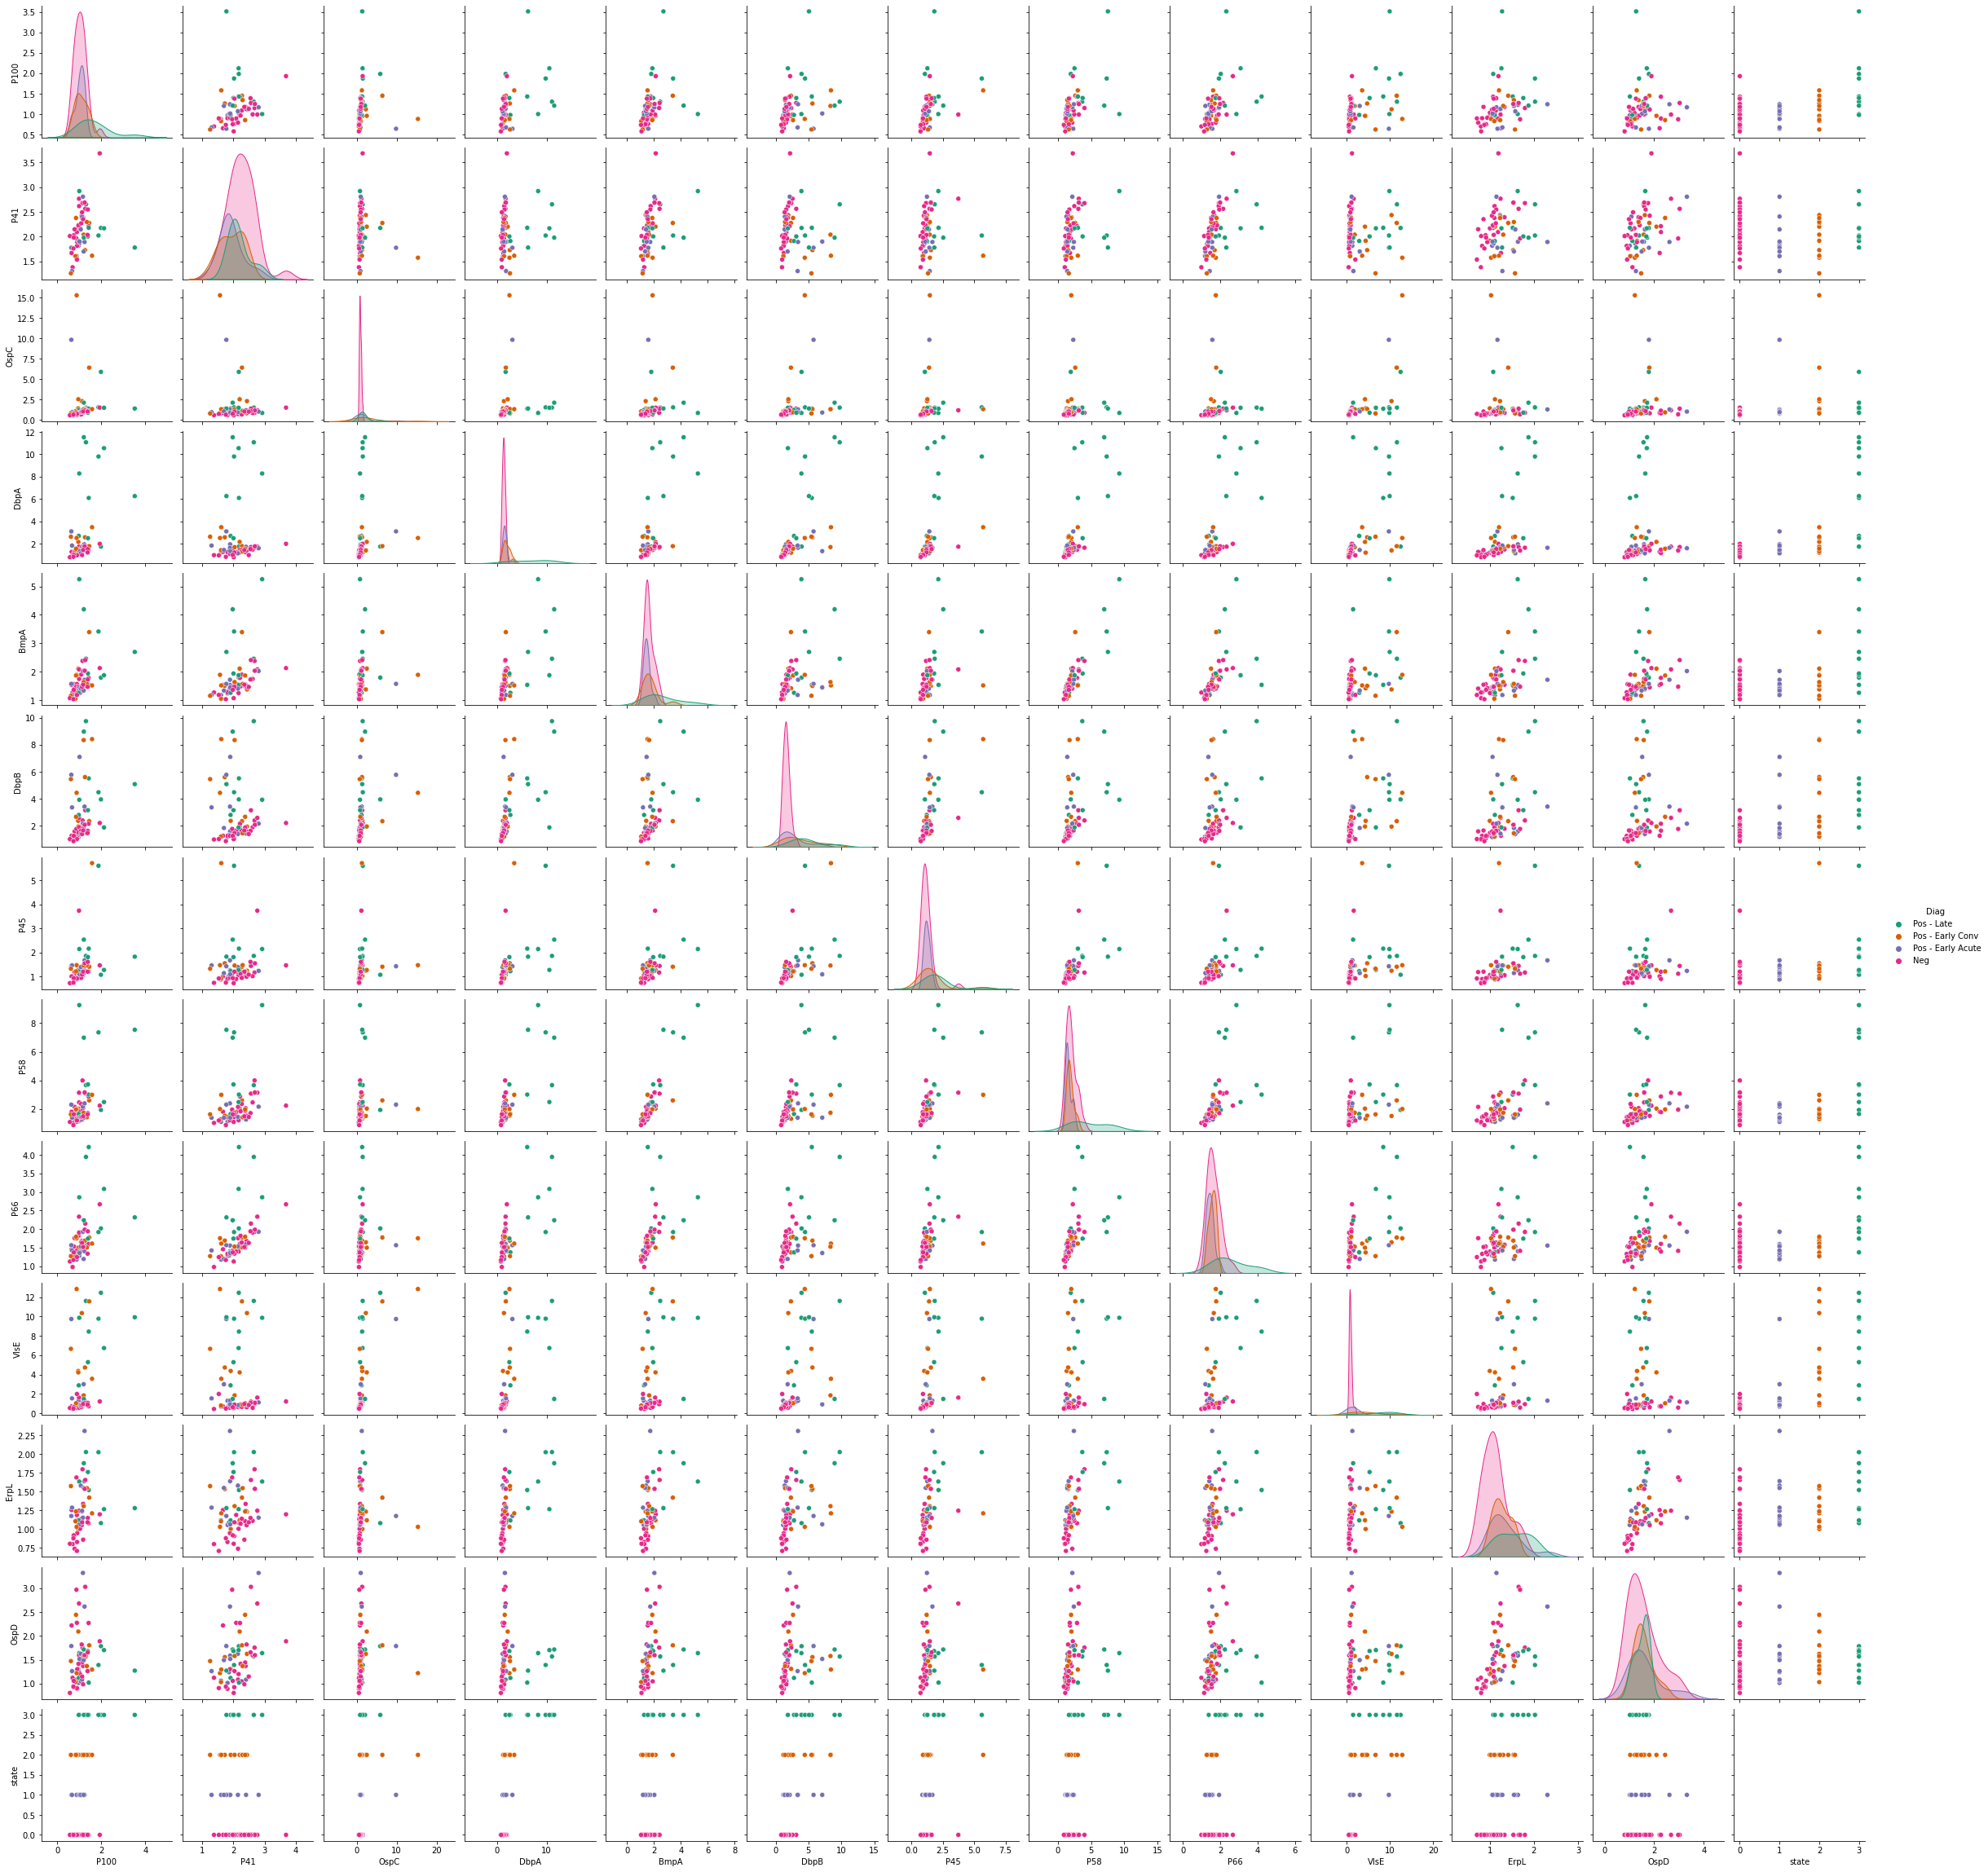

In [34]:
#Seaborn is a library for statistical graphs built on matplotlib and integrating well with pandas data structures
import seaborn as sns
#the following line of code produces pairwise plots of the columns in our dataframe using categories in the 'Diag' column 
#to determine color of graph points representing samples
sns.pairplot(df,hue='Diag',palette='Dark2')

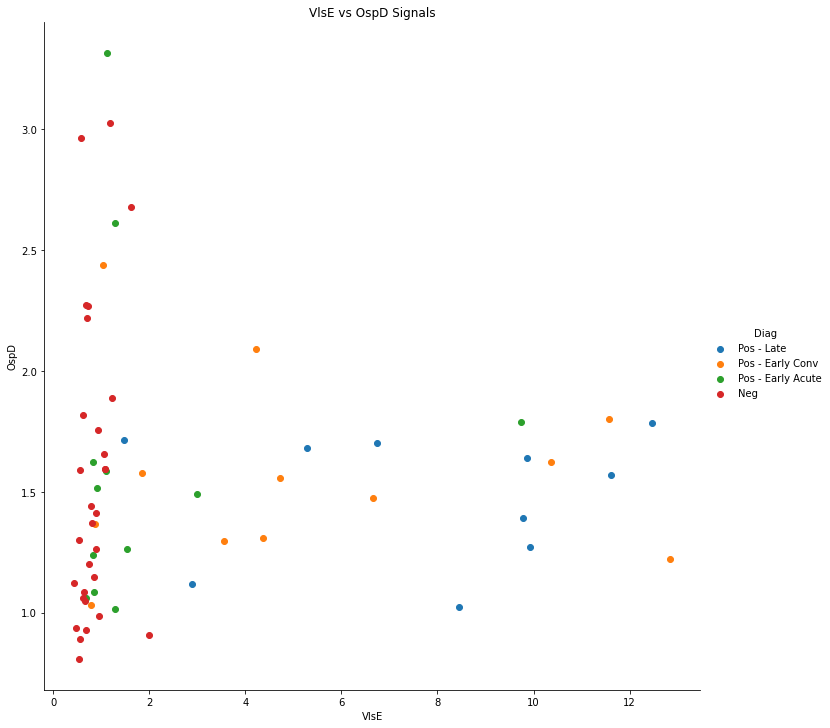

In [9]:
#this code also uses seaborn and produces a single pair plot of the VlsE and OspD columns of data, 
#and uses 'Diag' column categories to determine color per sample category
sns.FacetGrid(df, hue='Diag', height=10).map(plt.scatter, 'VlsE', 'OspD').add_legend().set(
    title='VlsE vs OspD Signals',
    xlabel='VlsE',
    ylabel='OspD'
)

Text(0.5, 1.0, 'Number of Samples by Diagnosis Category')

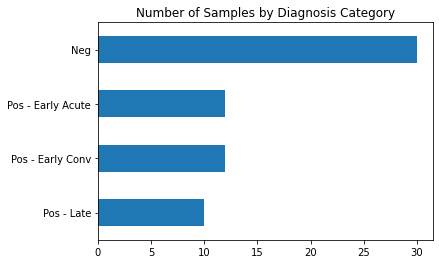

In [7]:
#Produces a barchart using Pandas dataframe built-in plot method
(df['Diag'].value_counts(sort=False).plot.barh().set_title('Number of Samples by Diagnosis Category'))

In [8]:
#this tells you what unique labels are in the "Diag" column and how many times
#each occur
df['Diag'].value_counts()

Neg                  30
Pos - Early Conv     12
Pos - Early Acute    12
Pos - Late           10
Name: Diag, dtype: int64

(array([43.,  3.,  2.,  4.,  0.,  2.,  1.,  5.,  1.,  3.]),
 array([ 0.43544994,  1.67638789,  2.91732585,  4.1582638 ,  5.39920176,
         6.64013971,  7.88107767,  9.12201562, 10.36295358, 11.60389153,
        12.84482949]),
 <BarContainer object of 10 artists>)

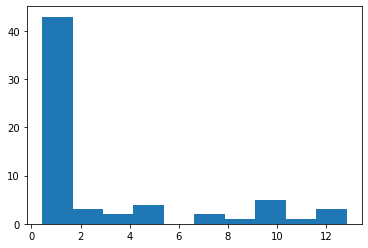

In [9]:
#histogram using Matplotlib
plt.hist('VlsE',bins=10,data=df)
#plt.yticks(np.arange(0, 25, 1)) <- if you wanted to specify y axis tick marks for y range 0 to 25 at each unit

In [10]:
#Recursive feature selection determines weakest feature for a given model, removes it, and repeats
#process until the specified number of features remains
#put dataframe into a compatible array for RFE
X = df[['P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values
y = df['Diag'].values
# create a base classifier used to evaluate a subset of attributes
#max_iter is set to 200 here, because as of 5/18/2022, solver did not converge with default of 100
model = LogisticRegression(max_iter=200)
# create the RFE model and remove weakest features until specified number remain
rfe = RFE(model, n_features_to_select=6)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False  True  True  True  True False]
[4 7 1 1 3 2 6 1 1 1 1 5]


In [31]:
#this is another method for feature ranking based on correlation
#using chi-square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.drop(['Diag','ID'], axis=1)  
y = df['Diag']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best(all in this case) features by rank

   Specs       Score
9   VlsE  151.517856
3   DbpA  108.628481
5   DbpB   36.144856
7    P58   31.510282
2   OspC   25.027869
6    P45    5.764960
4   BmpA    5.512540
8    P66    5.057815
0   P100    2.992932
10  ErpL    1.238354
1    P41    0.637111
11  OspD    0.079386


[0.05802799 0.07357078 0.0767731  0.14548178 0.05748641 0.09659886
 0.057138   0.08431142 0.06969199 0.1511064  0.0766014  0.05321187]


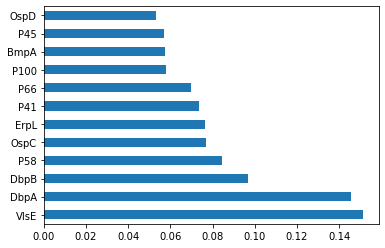

In [32]:
#this technique uses an internal attribute of the particular 
#classifier model to tell us the relative importances of features for its prediction
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

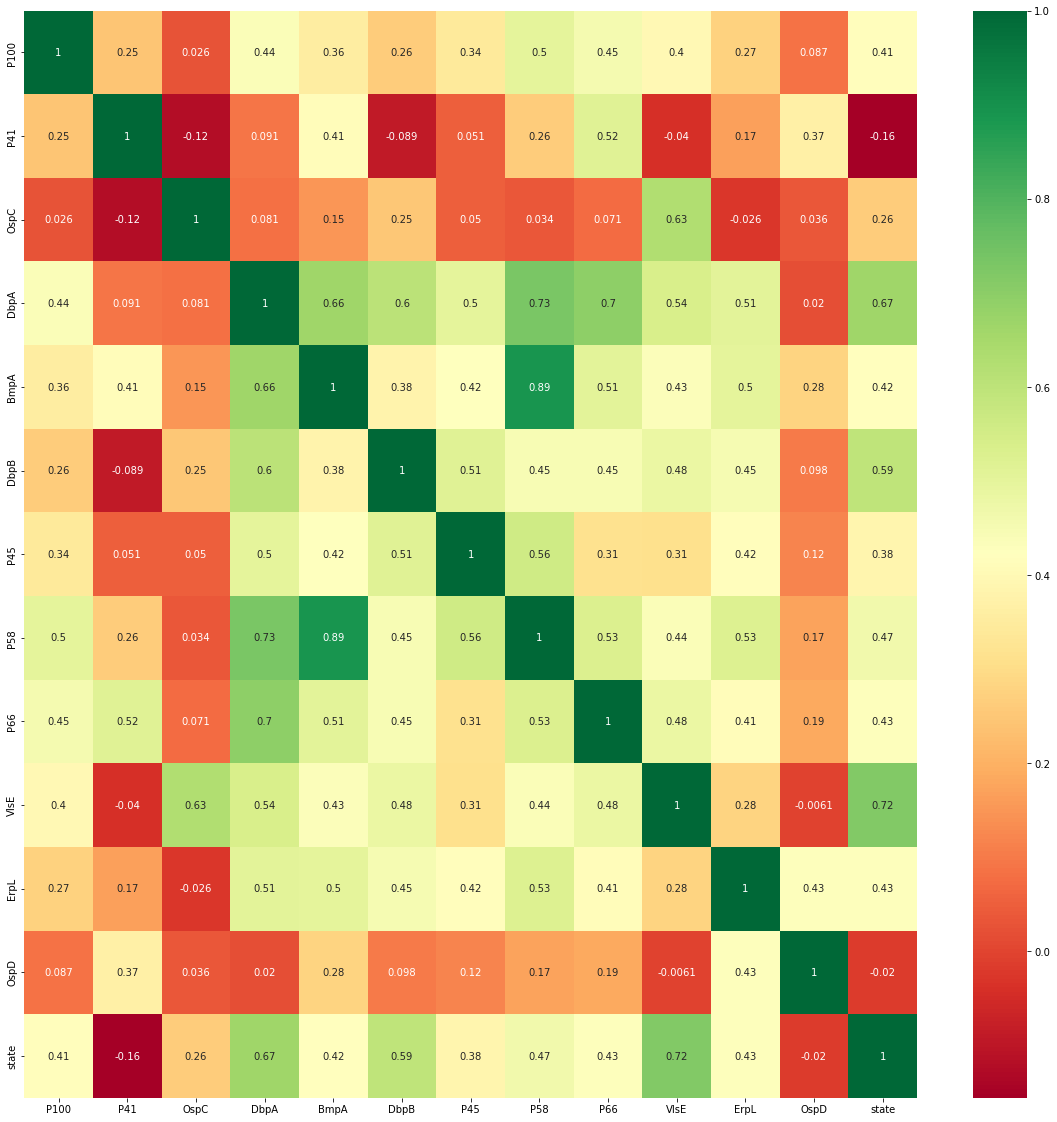

In [33]:
import seaborn as sns
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to 
# generate numeric encoded label for 
#text based category values in Diag 
label = le.fit_transform(df['Diag'])
df["state"]=label
#get correlations of each feature in dataset (using default, Spearman)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot a heat map of the 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")